<a href="https://colab.research.google.com/github/kisBelus/Machine-Learning/blob/master/HW_3/HOMEWORK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

#PROBLEM 1


#Random Data Generator
get_random_data(w, b, mu, sigma, m)

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.zeros(m*2)
  data = data.reshape(m,2)
  labels = np.zeros(m)

  for i in range(0,m):
    c = np.random.choice([0,1])
    x_1 = np.random.uniform(0,1)
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n
    data[i][0] = x_1
    data[i][1] = x_2
    labels[i] = c
    
  return data, labels

#Display Data Function

display_random_data(labels, data)

In [0]:
def display_random_data(labels, data):
  for i in range(len(labels)):
    if labels[i] == 1:
      plt.plot(data[i][0],data[i][1], 'ro', label = 'C = 0')
    else:
      plt.plot(data[i][0],data[i][1], 'bo', label = 'C = 1')
  
  plt.title("Data Points")
  plt.xlabel("x_1")
  plt.ylabel("y_2")
  plt.show()
  

#Generate and Display Data

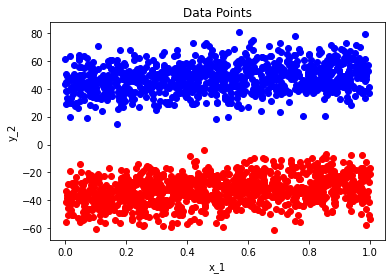

In [7]:
w = 9
b = 3
mu = 40
sigma = 10
m = 2000
data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(labels, data)

#Data Split Function

In [0]:
def data_split(data, labels):
  num = data.size/2
  split_num = num*.8

  #gets training data
  train_data = data[:int(split_num)]

  #gets test data
  test_data = data[int(split_num):]

  #gets test and train labels
  train_labels = labels[:int(split_num)]
  test_labels = labels[int(split_num):]
  return train_data, test_data, train_labels, test_labels

#Splitting the Test and Training Data

TRAINING DATA


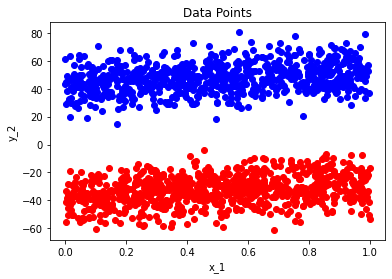


TEST DATA


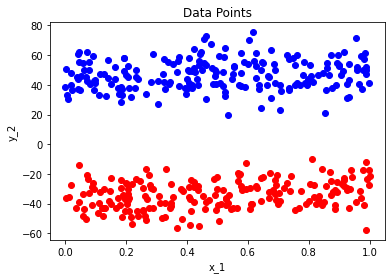

In [9]:
train_data, test_data, train_labels, test_labels = data_split(data, labels)

print("TRAINING DATA")
display_random_data(train_labels, train_data)
print()
print("TEST DATA")
display_random_data(test_labels, test_data)

#PROBLEM 2

#Building the Model

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, batch_size=400, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.7500
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000


#Displaying Model Training Results

Weights are taken from the model to graph the estimated slope (orange line) of the dividing line

The true slope (blue line) of the dividing line is graphed using the initial weight and bias 

The color gradient (heatmap) is produced by the fn(x,y) function which uses the weights of the model as well

lines

In [0]:
weights = model.get_weights()


def fn(x,y):
  return x*weights[0][0]+y*weights[0][1]+weights[1]

def f_true(x):
  return w*x+b

def f_est(x):
  return (-x*weights[0][0]-weights[1])/weights[0][1]

x = np.linspace(0, 1, 50)
y = np.linspace(-100,100, 50)
x1, y1 = np.meshgrid(x,y)

z = fn(x1,y1)

y_true = f_true(x)
y_est = f_est(x)

Training Data Results

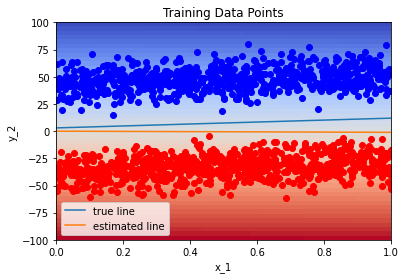

In [12]:
plt.plot(x,y_true, label = 'true line')
plt.plot(x,y_est, label = 'estimated line')

plt.imshow(z, extent=[0,1,-100,100], origin='lower',cmap='coolwarm',aspect='auto')
#plt.axis(aspect='image') removed

for i in range(len(train_labels)):
  if labels[i] == 1:
    plt.plot(train_data[i][0],train_data[i][1], 'ro')
  else:
    plt.plot(train_data[i][0],train_data[i][1], 'bo')
  
plt.title("Training Data Points")
plt.xlabel("x_1")
plt.ylabel("y_2")
plt.legend()
plt.show()

Test Loss and Accuracy

In [13]:
test_loss, test_acc = model.evaluate(test_data,test_labels)

13/13 [==============================] - 0s 1ms/step - loss: 5.0178e-04 - accuracy: 1.0000


Test Data Results

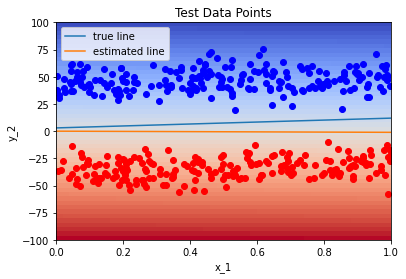

In [14]:
for i in range(len(test_labels)):
  if test_labels[i] == 1:
    plt.plot(test_data[i][0],test_data[i][1], 'ro')
  else:
    plt.plot(test_data[i][0],test_data[i][1], 'bo')
  
plt.plot(x,y_true, label = 'true line')
plt.plot(x,y_est, label = 'estimated line')

plt.imshow(z, extent=[0,1,-100,100], origin='lower',cmap='coolwarm',aspect='auto')
#plt.axis(aspect='image') removed

plt.title("Test Data Points")
plt.xlabel("x_1")
plt.ylabel("y_2")
plt.legend()
plt.show()

#Problem 3

#Numpy Model

Implementation

In [0]:
epochs = 10
lr = 0.01
num = int(data.size/2)
split_num = int(num*.8)

w1 = np.random.randn(1)
w2 = np.random.randn(1)
b1 = np.zeros(1)

def sigmoid(x):
  return 1/(1+np.exp(-x))


for epoch in np.arange(epochs):
  for i in np.arange(split_num):
    pred_calc = w1 * train_data[i][0] + w2 * train_data[i][1] + b1
    pred_label = sigmoid(pred_calc)

    grad_w1 = (pred_label - train_labels[i]) * train_data[i][0]
    grad_w2 = (pred_label - train_labels[i]) * train_data[i][1]
    grad_b  = (pred_label - train_labels[i])

    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b1  -= lr * grad_b

Test Loss

In [16]:
test_loss = 0
r = num-split_num
for i in np.arange(r):
  test_loss += 0.5*(sigmoid(w1 * test_data[i][0] + w2 * test_data[i][1] + b1)-test_labels[i])**2
test_loss /= r

print(test_loss)

[3.99340606e-14]


lines

In [0]:
def fn2(x,y):
  return x*w1+y*w2+b1

def f_true(x):
  return w*x+b

def f_est2(x):
  return (-x*w1-b1)/w2

x = np.linspace(0, 1, 50)
y = np.linspace(-100,100, 50)
x1, y1 = np.meshgrid(x,y)

z2 = fn2(x1,y1)

y_true = f_true(x)
y_est2 = f_est2(x)

Training Data Results

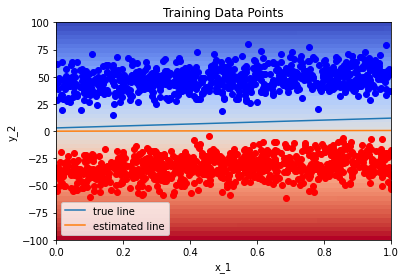

In [18]:
plt.plot(x,y_true, label = 'true line')
plt.plot(x,y_est2, label = 'estimated line')

plt.imshow(z2, extent=[0,1,-100,100], origin='lower',cmap='coolwarm',aspect='auto')
#plt.axis(aspect='image') removed

for i in range(len(train_labels)):
  if labels[i] == 1:
    plt.plot(train_data[i][0],train_data[i][1], 'ro')
  else:
    plt.plot(train_data[i][0],train_data[i][1], 'bo')
  
plt.title("Training Data Points")
plt.xlabel("x_1")
plt.ylabel("y_2")
plt.legend()
plt.show()

Test Data Results

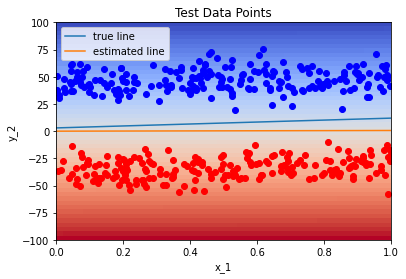

In [19]:
for i in range(len(test_labels)):
  if test_labels[i] == 1:
    plt.plot(test_data[i][0],test_data[i][1], 'ro')
  else:
    plt.plot(test_data[i][0],test_data[i][1], 'bo')
  
plt.plot(x,y_true, label = 'true line')
plt.plot(x,y_est2, label = 'estimated line')

plt.imshow(z2, extent=[0,1,-100,100], origin='lower',cmap='coolwarm',aspect='auto')
#plt.axis(aspect='image') removed

plt.title("Test Data Points")
plt.xlabel("x_1")
plt.ylabel("y_2")
plt.legend()
plt.show()